In [ ]:
using SimpleDifferentialOperators, SparseArrays, LinearAlgebra, Test
μ = 0.0 # constant negative drift
σ = 1.
M = 3 # size of grid (interior points)
@assert μ <= 0 # make sure we are using negative drifts
x̄ = range(0.0, 1.0, length = (M+2))
Δ = step(x̄)
x = interiornodes(x̄); # i.e., x̄[2:end-1]

In [2]:
θ = 1.0
δ = 0.
h(x) = θ * exp(-θ * x) / (1 - exp(-θ * maximum(x̄)))

h (generic function with 1 method)

In [3]:
# vectorized h (use uniform distribution for now for simplicity)
# h̄ = h.(x) / (sum(h.(x)))
h̄ = ones(M)*(1/M)

3-element Array{Float64,1}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

In [4]:
# S is μf(0) + (σ^2/2)f'(0); in discretized system it is
# μ f_0 + (σ^2/2) (f_1 - f_0)/Δ
bc = (Absorbing(), Reflecting())
L_KFE = -μ*L₁₊bc(x̄, bc) + σ^2 / 2 * L₂bc(x̄, bc)
Sh =  [(μ-σ^2/(2*Δ)).*h̄ (σ^2/(2*Δ)).*h̄ spzeros(M, M-2)]
L_bc = Array(L_KFE + Sh)

3×3 Array{Float64,2}:
 -16.6667      8.66667   0.0
   7.33333   -15.3333    8.0
  -0.666667    8.66667  -8.0

In [5]:
using Arpack # library for extracting eigenvalues and eigenvectors

# extract eigenvalues and eigenvectors, smallest eigenval in magintute first
λ, ϕ = eigs(L_bc, which = :SM); 
# extract the very first eigenvector (associated with the smallest eigenvalue)
f_ss = real.(ϕ[:,1]);
# normalize it
f_ss = f_ss / sum(f_ss)

┌ Warning: Adjusting nev from 6 to 1
└ @ Arpack C:\Users\Chiyoung Ahn\.julia\packages\Arpack\UiiMc\src\Arpack.jl:99


3-element Array{Float64,1}:
 0.2013262347646525 
 0.35698325869942665
 0.4416905065359208 

In [6]:
eigvals(Array(L_bc))

3-element Array{Float64,1}:
 -26.136597195201347 
 -12.564106974550972 
  -1.2992958302476723

In [7]:
# check if f_ss is in fact a stationary distribution 
# i.e., the resulting product should be a zero vector
L_bc * f_ss

3-element Array{Float64,1}:
 -0.26158233734917813
 -0.4638268594963906 
 -0.573886633402104  

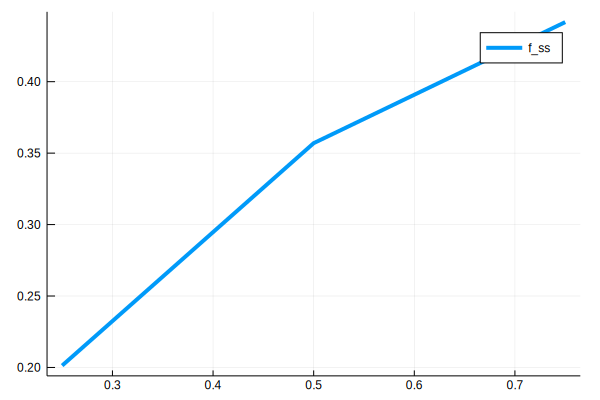

In [8]:
using Plots 
plot(x, f_ss, lw = 4, label = "f_ss")